# План
1. Алгоритм knn
2. Оценка качества модели
3. Обнаружение переобучения
4. Поиск гиперапарметров

In [41]:
!which python

/home/maksim/anaconda3/envs/Pytorch/bin/python


In [42]:
import sys
print(sys.executable)  # Путь к исполняемому файлу Python
print(sys.prefix)      # Путь к корневой папке виртуального окружения



/home/maksim/anaconda3/envs/Pytorch/bin/python
/home/maksim/anaconda3/envs/Pytorch


In [43]:
!conda info --envs

# conda environments:
#
base                     /home/maksim/.config/jupyterlab-desktop/jlab_server
                         /home/maksim/anaconda3
                      *  /home/maksim/anaconda3/envs/Pytorch



In [1]:
# Импортируем необходимые библиотеки
import numpy as np  # Для работы с массивами и числовыми операциями
from sklearn.datasets import make_classification  # Для генерации случайного набора данных для классификации

# Импортируем функции для разбиения данных на обучающую и тестовую выборки, кросс-валидации и подбора параметров
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Импортируем классы классификатора и регрессора метода k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Импортируем метрики для оценки моделей
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Импортируем метрики для оценки моделей
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt


# Алгоритм knn

## пример для классифкации на двумерных данных

**n_samples=100:** количество выборок в наборе данных, в данном случае 100.  
**n_features=2:** количество признаков (фичей) в наборе данных, в данном случае 2.  
**n_informative=2:** количество информативных признаков, которые действительно влияют на выходные классы, в данном случае 2.  
**n_classes=3:** количество классов, которые необходимо предсказать, в данном случае 3.  
**n_redundant=0:** количество избыточных признаков, которые являются линейными комбинациями информативных признаков, в данном случае 0.  
**n_clusters_per_class=1:** количество кластеров на каждый класс, в данном случае 1.  
**random_state=3:** начальное значение для генератора случайных чисел, чтобы обеспечить воспроизводимость результата.

In [2]:
X,y = make_classification(
          n_samples=100,
          n_features=2,
          n_informative=2,
          n_classes=3,
          n_redundant=0,
          n_clusters_per_class=1,
          random_state=3,
)

In [3]:
X

array([[ 2.21886651,  1.38263506],
       [ 2.07169996, -1.07356824],
       [-1.93977262, -0.85055602],
       [ 2.08436759,  1.07500638],
       [ 0.94998372,  0.61538543],
       [-0.3878893 , -0.95580336],
       [ 1.98118534,  0.58871202],
       [ 1.65508134, -1.29954273],
       [ 2.60996691,  0.67390406],
       [-0.29137472, -0.2257671 ],
       [-0.98418733, -0.29293569],
       [-0.15399877,  0.42254322],
       [-0.22167729, -0.32467969],
       [ 2.88285048, -1.44657734],
       [ 1.17459743, -0.90427191],
       [-0.31704075, -0.34842358],
       [ 1.48023527, -1.08130433],
       [ 1.51863252, -1.23980866],
       [-0.7044121 , -0.06132962],
       [ 1.06060558,  0.83918244],
       [ 3.04237626, -2.38948447],
       [-1.60671473, -1.21737505],
       [-0.2410213 , -0.44815041],
       [ 1.88783328, -1.70376068],
       [ 0.1286542 , -0.52542956],
       [-1.68428971,  1.29496961],
       [-0.7699091 , -0.5500474 ],
       [ 3.06365602, -2.16142073],
       [-1.06474935,

In [4]:
y

array([0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2])

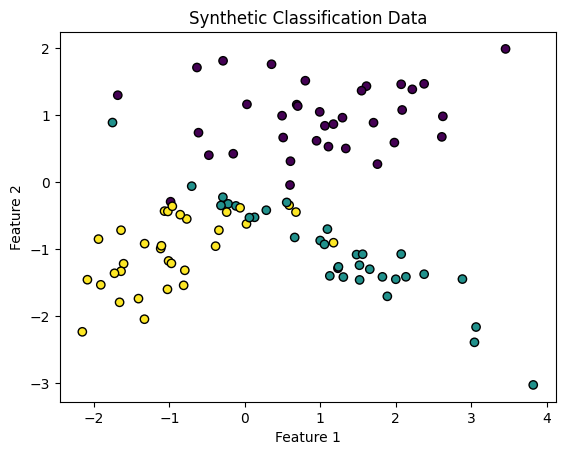

In [5]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Data')
plt.show()

Обучающая и тестовая (проверять)

70% на 30%

80% на 20%

In [6]:
#подготовка тестового и тренировочного наборов данных

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [7]:
X_train

array([[-1.93977262, -0.85055602],
       [ 0.60428992,  0.31102739],
       [-1.64108316, -0.71790889],
       [-0.61454121,  0.73624857],
       [ 1.06060558,  0.83918244],
       [ 2.62368333,  0.97996059],
       [ 0.28401087, -0.41971289],
       [ 3.06365602, -2.16142073],
       [-0.85644943, -0.48631119],
       [ 1.17333444,  0.8640935 ],
       [-0.79602966, -1.31557627],
       [-2.15412795, -2.232662  ],
       [-1.66026857, -1.79291055],
       [ 0.66021391, -0.82571524],
       [ 0.5544552 , -0.30371376],
       [-0.81128541, -1.53956321],
       [ 1.61122064,  1.43035   ],
       [-1.02077644, -0.43813357],
       [ 1.88783328, -1.70376068],
       [ 0.80113229,  1.51109105],
       [ 2.37549206,  1.46462522],
       [-0.63517453,  1.70819656],
       [ 0.35349941,  1.7568708 ],
       [-0.31704075, -0.34842358],
       [ 0.49288933,  0.98962118],
       [-0.28911786,  1.80794921],
       [ 0.99792686, -0.87150485],
       [ 2.37576193, -1.37351716],
       [-0.7699091 ,

In [8]:
y_train

array([2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1])

In [9]:
n_neighbors=10
model_cl = KNeighborsClassifier(n_neighbors = n_neighbors)
model_cl.fit(X_train, y_train) # тренировка модели fit

KNeighborsClassifier(n_neighbors=10)

Команда `%%time` измеряет время выполнения кода один раз.
Она возвращает общее время выполнения кода, включая время процессора (CPU time) и реальное время (Wall time).

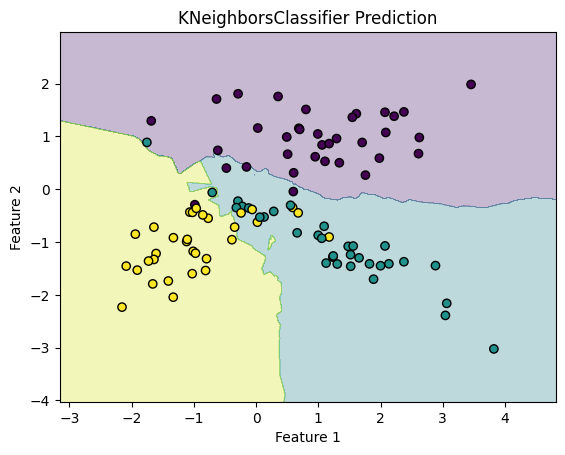

CPU times: user 11.9 s, sys: 187 ms, total: 12.1 s
Wall time: 12 s


In [10]:
%%time
# Построение сетки точек.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Создаем все возможные комбинации точек x, y
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# flatten() - для преобразования их в одномерные массивы.
# np.c_ - используется для объединения массивов вдоль второй оси (в случае двумерных массивов это столбцы)
# Прогнозирование классов для каждой точки сетки
pred = model_cl.predict(np.c_[xx.flatten(), yy.flatten()]) # предсказание predict
pred = pred.reshape(xx.shape)

# Построение графика
plt.contourf(xx, yy, pred, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNeighborsClassifier Prediction')
plt.show()

## Оценка качества модели

In [11]:
y_train_pred = model_cl.predict(X_train) # предсказание на обучающей выборке
y_test_pred = model_cl.predict(X_test) # проверка на тестовой выборке

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Вычисление метрик
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)


In [13]:
accuracy_train, accuracy_test

(0.875, 0.85)

In [14]:
conf_matrix_train, conf_matrix_test

(array([[25,  3,  0],
        [ 0, 24,  1],
        [ 0,  6, 21]]),
 array([[6, 1, 1],
        [1, 6, 0],
        [0, 0, 5]]))

### бинарная классификация

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Генерация случайных данных для примера
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Разделение данных на обучающую и тестовую выборки, 80 на 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Обучение модели
model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

In [16]:
# Предсказание вероятностей
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [17]:
y_pred_prob

array([0.8, 0. , 0.2, 0.2, 0.8, 1. , 0.6, 0.8, 0.4, 0.6, 0.2, 0.8, 0.8,
       0.4, 0. , 0.2, 0.4, 0. , 1. , 0.2, 0.8, 0. , 1. , 0.2, 1. , 0.6,
       1. , 1. , 0.4, 0.2, 0. , 1. , 1. , 1. , 1. , 0.2, 0.2, 0. , 0.4,
       0.8, 0.8, 1. , 0.8, 0.6, 0. , 1. , 0.2, 0.4, 0.4, 0. , 1. , 0.2,
       0.2, 0. , 0.6, 0. , 1. , 0.2, 0. , 0.8, 0.2, 0.4, 0.6, 0. , 0. ,
       0.2, 1. , 0.2, 0. , 0.6, 0. , 0.2, 1. , 1. , 0.6, 1. , 0. , 0.2,
       0.2, 0. , 0. , 0.8, 0.4, 1. , 0.8, 0. , 0.2, 0. , 0.4, 0.2, 1. ,
       0.8, 1. , 0.4, 0.2, 1. , 0.8, 0.2, 1. , 0. , 1. , 0.8, 0.8, 0.6,
       0.6, 1. , 0. , 0.6, 0.2, 0.2, 0.8, 0.8, 0. , 0.8, 0. , 0.2, 1. ,
       0.2, 0.6, 0.4, 0. , 0.4, 0.2, 0.4, 0. , 0. , 0.2, 0.2, 0.6, 1. ,
       0.2, 1. , 0. , 0.6, 0.4, 0.6, 0. , 0.4, 0. , 0.6, 1. , 0.8, 0.2,
       0.4, 1. , 0.4, 0. , 0.6, 0.8, 0.4, 0. , 0.2, 0.4, 0.8, 0.2, 0.6,
       1. , 0.4, 0. , 0.2, 0.4, 0.8, 1. , 0.6, 0.4, 1. , 0.8, 0.2, 0.2,
       0. , 0.4, 0.2, 0.8, 0.2, 0.8, 1. , 0.2, 0.2, 0. , 0.6, 0.

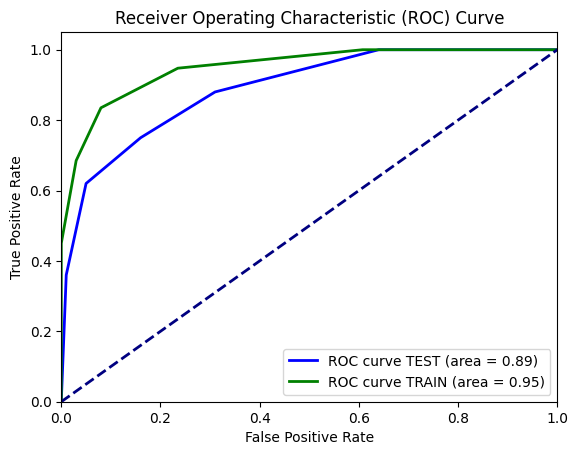

In [18]:

# Вычисление ROC кривой и AUC
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Построение ROC кривой
plt.figure()
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve TEST (area = {roc_auc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='green', lw=2, label=f'ROC curve TRAIN (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## пример для регрессии на двумерных данных

In [19]:
# Создание синтетического набора данных
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 точек в 2D пространстве
y = np.sin(X) + np.cos(X) + np.random.randn(100, 1) * 0.1  # Зависимая переменная

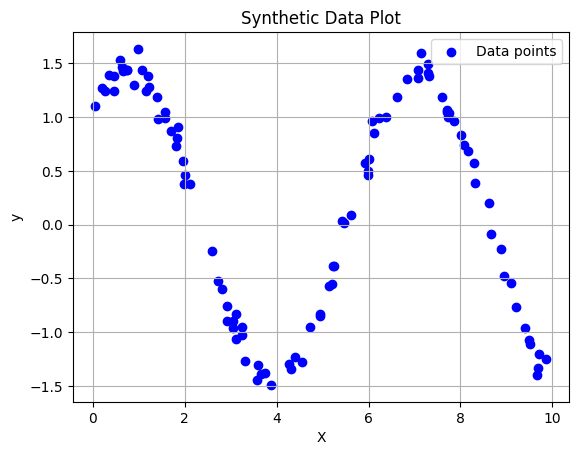

In [20]:
# Преобразуем X и y в одномерные массивы для построения графика
X_reshaped = X.flatten()
y_reshaped = y.flatten()

# Построение графика
plt.scatter(X_reshaped, y_reshaped, color='blue', label='Data points')
plt.title('Synthetic Data Plot')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Обучение модели k-NN
model_reg = KNeighborsRegressor(n_neighbors=10)
model_reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [23]:
# Предсказание на обучающей и тестовой выборках
y_pred_train = model_reg.predict(X_train)
y_pred_test = model_reg.predict(X_test)

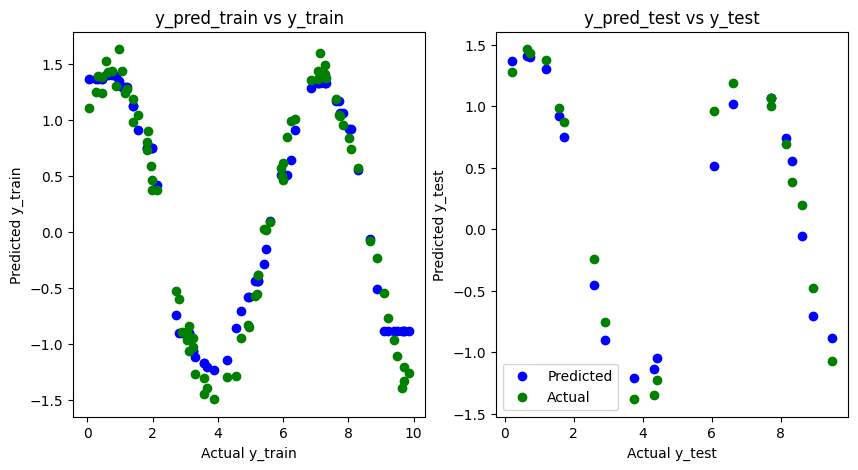

In [24]:
#  Визуализация предсказанных значений против фактических значений для обучающей выборки
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_pred_train, color='blue', label='Predicted')
plt.scatter(X_train, y_train, color='green', label='Actual')
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train')
plt.title('y_pred_train vs y_train')

# Визуализация предсказанных значений против фактических значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_pred_test, color='blue', label='Predicted')
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.xlabel('Actual y_test')
plt.ylabel('Predicted y_test')
plt.title('y_pred_test vs y_test')

plt.legend()
plt.show()

## Оценка качества модели

In [25]:

# Вычисление метрик
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)


# Вычисление метрик
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)



In [26]:
mae_train, mae_test

(0.14918951156291796, 0.14771943484122524)

In [27]:
mse_train, mse_test

(0.03658034034228753, 0.031212253299326382)

In [28]:
rmse_train, rmse_test

(np.float64(0.19125987645684478), np.float64(0.17666989924524887))

In [29]:
r2_train, r2_test

(0.9654575682215031, 0.9684566039020744)

# Кросс валидация

In [30]:
# Определение стратегии кросс-валидации (например, KFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Выполнение кросс-валидации и вывод результатов
cv_scores = cross_val_score(model_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

mse_scores = -cv_scores  # Меняем знак, так как cross_val_score возвращает отрицательное MSE
print("Mean MSE:", mse_scores.mean())
print("Standard deviation of MSE:", mse_scores.std())

Mean MSE: 0.09951941217818686
Standard deviation of MSE: 0.0765276961622589


In [31]:
mse_scores

array([0.24776564, 0.04228225, 0.06824614, 0.04448006, 0.09482298])

In [32]:
np.mean(y)

np.float64(0.22467584774883131)

## Cross val со своей скор функцией

In [33]:
from sklearn.metrics import make_scorer

In [34]:
def smape(y_true, y_pred):
    e = np.abs(y_true - y_pred)
    s = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(e / s) * 100

In [35]:
# ошибка, нужно минимизировать, greater_is_better=False
scorer = make_scorer(smape, greater_is_better=False)

In [36]:
scores = cross_val_score(
    model_reg, X_train, y_train,
    scoring=scorer, n_jobs=-1,
    cv=5
    )
scores

array([-37.85897573, -41.71608975, -22.74312324, -27.56525541,
       -36.63334614])

In [37]:
(-1)*scores.mean()

np.float64(33.30335805206755)

# Как подбирать параметры

In [38]:
# Создание списка значений k, которые вы хотите оценить
k_values = [1, 2, 3, 5, 7, 9, 10, 11, 20]

# Инициализация списка для сохранения средних оценок точности для каждого значения k
mean_scores = []

# Перебор значений k
for k in k_values:
    # Создание модели k-ближайших соседей
    knn = KNeighborsRegressor(n_neighbors=k)

    # Вычисление средней оценки точности с использованием перекрестной проверки
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # cv=5 означает 5-кратную перекрестную проверку
    mean_scores.append(-1*np.mean(scores))

# Вывод результатов
for k, score in zip(k_values, mean_scores):
    print("k =", k, "mean_squared_error:", score)


k = 1 mean_squared_error: 0.023172769732627992
k = 2 mean_squared_error: 0.01884398022888178
k = 3 mean_squared_error: 0.02415682773327013
k = 5 mean_squared_error: 0.03470956711140484
k = 7 mean_squared_error: 0.044137180442696336
k = 9 mean_squared_error: 0.07904464198146773
k = 10 mean_squared_error: 0.10302801724784535
k = 11 mean_squared_error: 0.1257362515727612
k = 20 mean_squared_error: 0.45737469724919677


In [39]:
list(range(2,10,2))

[2, 4, 6, 8]

In [40]:
param_grid_cust={
    'n_neighbors': range(2,10,2),
    'p': [1,2],
}
model = KNeighborsRegressor()
gs_knn = GridSearchCV(model, param_grid=param_grid_cust,
                       scoring=scorer, n_jobs=-1, cv=5)
gs_knn.fit(X_train, y_train)


print(f'Гиперпараметры лучшей модели: {gs_knn.best_params_}')
print(f'Значение SMAPE: {-1 * gs_knn.best_score_}')

Гиперпараметры лучшей модели: {'n_neighbors': 2, 'p': 1}
Значение SMAPE: 18.812653398320887
